In [1]:
!pip install deflate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.2/167.2 KB 3.7 MB/s eta 0:00:00


In [2]:
!wget https://dl3.pushbulletusercontent.com/uUN2AiPUxxvqfJlWaWhbhNQdZVrprSBu/code.zip
!unzip code.zip
!rm EC.py

--2023-03-07 15:58:39--  https://dl3.pushbulletusercontent.com/uUN2AiPUxxvqfJlWaWhbhNQdZVrprSBu/code.zip
Resolving dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)... 35.208.62.122
Connecting to dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)|35.208.62.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4934 (4.8K) [application/x-zip-compressed]
Saving to: ‘code.zip’

code.zip            100%[===================>]   4.82K  --.-KB/s    in 0.001s  

2023-03-07 15:58:40 (6.64 MB/s) - ‘code.zip’ saved [4934/4934]

Archive:  code.zip
  inflating: EC.py                   
  inflating: mnca.py                 
  inflating: neighborhoods/mask_c1.txt  
  inflating: neighborhoods/mask_c2.txt  
  inflating: neighborhoods/mask_c3.txt  








-----------Generation: 0-----------
--------------------------------------------------
---------------------POPULATION-----------------------------
Population:  [[[(0.162, 0.629, 1), (0.448, 0.473, 0), (0.52, 0.636, 1)], [(0.493, 0.674, 0), (0.124, 0.252, 0), (0.563, 0.601, 0)], [(0.47, 0.555, 0), (0.07, 0.481, 1), (0.891, 0.917, 1)]], [[(0.105, 0.902, 0), (0.734, 0.879, 0), (0.66, 0.697, 0)], [(0.609, 0.917, 1), (0.692, 0.802, 1), (0.695, 0.988, 0)], [(0.357, 0.873, 1), (0.6, 0.762, 0), (0.379, 0.664, 0)]], [[(0.857, 0.912, 0), (0.912, 0.952, 0), (0.078, 0.336, 0)], [(0.354, 0.444, 0), (0.434, 0.965, 1), (0.343, 0.948, 0)], [(0.84, 0.865, 1), (0.582, 0.665, 1), (0.783, 0.968, 0)]], [[(0.641, 0.826, 0), (0.641, 0.719, 0), (0.568, 0.703, 0)], [(0.608, 0.634, 1), (0.769, 0.788, 0), (0.22, 0.66, 1)], [(0.353, 0.875, 0), (0.67, 0.944, 1), (0.812, 0.835, 0)]], [[(0.082, 0.655, 0), (0.522, 0.745, 1), (0.958, 0.99, 0)], [(0.123, 0.9, 0), (0.237, 0.994, 0), (0.504, 0.862, 0)], [(0.423, 0

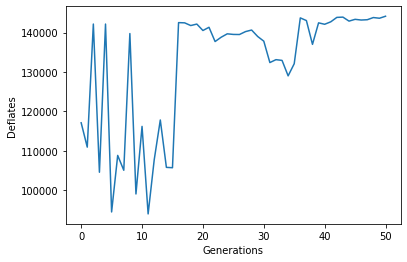

In [3]:
from tempfile import tempdir
import numpy as np
import sys
import random
np.set_printoptions(threshold=sys.maxsize)

from mnca import mnca

OVERALL_PROBABILITY_ATLEAST = 1
POPULATION_SIZE = 10 #3
GENERATION_SIZE = 50 #3
NUMBER_OF_NEIGHBORHOODS = 3 # for random number of nh put random function here
NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD = 3 # for random number of nh bounds put random function here

total_sum = 3*NUMBER_OF_NEIGHBORHOODS*NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD
# total_sum = 3*POPULATION_SIZE*NUMBER_OF_NEIGHBORHOODS*NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD


PROBABILITY_OF_INSERTING_A_NEW_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
PROBABILITY_OF_REMOVING_A_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
PROBABILITY_OF_CHANGING_A_RULE = OVERALL_PROBABILITY_ATLEAST/total_sum
# we take average as gene rather than sum because for sum we need to consider radius each time

# GENERATE RANDOM RULE
def generate_random_rule():
    number_of_neighborhood = NUMBER_OF_NEIGHBORHOODS
    number_of_bounds_in_each_neighborhod_average_or_sum = NUMBER_OF_BOUNDS_IN_EACH_NEIGHBORHOOD
    rule = []
    for i in range(number_of_neighborhood):
        ranges = []
        for j in range(number_of_bounds_in_each_neighborhod_average_or_sum):
            lower = round(random.uniform(0, 1),3)
            upper = round(random.uniform(lower, 1),3)
            new_next_state = random.choice([0, 1]) # for 2 states
            # new_next_state = random.choice([0, 1, 2]) # for 3 states
            ranges.append((lower, upper, new_next_state))
        rule.append(ranges)
    return rule

# print(generate_random_rule())



# POPULATION
def init_population():
    population_size = POPULATION_SIZE
    population = []
    for i in range(population_size):
        individual = generate_random_rule()
        population.append(individual)
    return population


# print(init_population())

# FITNESS / DEFLATE
def calculate_deflate(genotype):
    deflate = mnca(genotype)
    return deflate

# poopulation = init_population()
# print(calculate_deflate(poopulation[0]))


# PROPORTIONATE SELECTION / ROULETTTE WHEEL SELECTION
def roulette_wheel_selection(population, fitness_values):

    sorted_population = [x for _,x in sorted(zip(fitness_values,population))]
    sorted_fitness_scores = [_ for _,x in sorted(zip(fitness_values,population))]
    fitness_values = sorted_fitness_scores
    population = sorted_population
    total_fitness = sum(fitness_values)
    probability_values = [fitness/total_fitness for fitness in fitness_values]
    cumulative_probability = np.cumsum(probability_values)
    selected_index = None
    random_value = random.uniform(0, 1)
    for i in range(len(population)):
        if random_value < cumulative_probability[i]:
            selected_index = i
            break

    return population[selected_index], fitness_values[selected_index]


# population = init_population()
# print("-----Intial Pop-----")
# print(population)
# print("-----Fitness Values-----")
# fitness_values = [calculate_deflate(individual) for individual in population]
# print(fitness_values)
# print("-----Selected Individual-----")
# selected_individual = roulette_wheel_selection(population, fitness_values)
# print(selected_individual)

# MUTATION FOR ADDING COMPLETELY NEW BOUND. PROMOTEES DIVERSITY.
def mutation(rule):
    try:
        number_of_neighborhoods = len(rule)
        for i in range(number_of_neighborhoods):
            number_of_bounds = len(rule[i])
            for j in range(number_of_bounds):
                prob_insert = PROBABILITY_OF_INSERTING_A_NEW_RULE
                prob_remove = PROBABILITY_OF_REMOVING_A_RULE
                prob_change = PROBABILITY_OF_CHANGING_A_RULE
                random_value = random.uniform(0, 1)
                # insert a value in the tuple rule
                if random_value < prob_insert:
                    new_bound = []
                    # lower = rule[i][j][0]
                    # upper = rule[i][j][1]
                    # new_next_state = rule[i][j][2]
                    # toss_a_coin = random.uniform(0,1)
                    # if(toss_a_coin<0.33):
                    #     lower = round(random.uniform(0, 1),3)
                    # elif(0.33<toss_a_coin<0.66):
                    #     upper = round(random.uniform(lower, 1),3)
                    # else:
                    #     new_next_state = random.choice([0, 1])
                    lower = round(random.uniform(0, 1),3)
                    upper = round(random.uniform(0, 1),3)
                    new_next_state = random.choice([0, 1])
                    if(lower>upper):
                        temp = lower
                        lower = upper
                        upper = temp
                    new_bound.append((lower, upper, new_next_state))
                    rule[i].extend(new_bound)
                # remove a tuple from the rule
                elif prob_insert <= random_value < prob_insert + prob_remove:
                    # add that code that allows not to wipe out the rule
                    # At least one tuple will stay in the rule set
                    # if rule length is more than 1, remove one rule tuple
                    if(len(rule[i])>1):
                        rule[i].pop(j)
                        number_of_bounds -= 1
                        j -= 1
                    # if rule length is exactly 1 you cannot wipe out the rule, in that case
                    # perform mutation again. And it repeats till it does not fall in this code section.
                    else:
                        mutation(rule[i])
                    
                
                # change a tuple from the rule by adding a small change
                elif prob_insert + prob_remove <= random_value < prob_insert + prob_remove + prob_change:
                    # lower = round(random.uniform(0, 1),3)
                    # upper = round(random.uniform(lower, 1),3)
                    # new_next_state = random.choice([0, 1])
                    delta = random.uniform(-0.100,0.100)
                    # if(rule[i][j][0]+delta<1 and rule[i][j][1]+delta>0 and rule[i][j][0]+delta< rule[i][j][1]+delta):
                    #     rule[i][j] = (round(rule[i][j][0]+(delta)), round(rule[i][j][1]+(delta)), rule[i][j][2])
                    toss_a_coin = random.uniform(0,1)
                    if(toss_a_coin<0.33):
                        rule[i][j][0] = rule[i][j][0]+delta
                        if(rule[i][j][0] > 1):
                            rule[i][j][0] = 1
                        elif(rule[i][j][0] < 0):
                            rule[i][j][0] = 0
                    elif(0.33<toss_a_coin<0.66):
                        # rule[i][j][1] = round(random.uniform(0, 1),3)
                        rule[i][j][1] = rule[i][j][1]+delta
                        if(rule[i][j][1] > 1):
                            rule[i][j][1] = 1
                        elif(rule[i][j][1] < 0):
                            rule[i][j][1] = 0
                    else:
                        if(rule[i][j][2] ==0):
                            rule[i][j][2] = 1
                        else:
                            rule[i][j][2] = 0
                    if(rule[i][j][0] > rule[i][j][1]):
                        temp = rule[i][j][0]
                        rule[i][j][0] = rule[i][j][1]
                        rule[i][j][1] = temp
    except:
        pass
    return rule

# pop = init_population()
# print(pop[0])
# print("------------------------")
# print(mutation(pop[0]))

# # CROSSOVER
# def crossover(parent1, parent2):
#     number_of_neighborhoods = len(parent1)
#     child = []
#     for i in range(number_of_neighborhoods):
#         number_of_bounds = len(parent1[i])
#         bounds = []
#         for j in range(number_of_bounds):
#             parent1_bound = parent1[i][j]
#             parent2_bound = parent2[i][j]
#             random_value = random.uniform(0, 1)
#             if random_value <= 0.5:
#                 bounds.append(parent1_bound)
#             else:
#                 bounds.append(parent2_bound)
#         child.append(bounds)
#     return child


# pop = init_population()
# print("------------------------parent 1--------------------------")
# print(pop[0])

# print("------------------------parent 2--------------------------")
# print(pop[1])
# print("------------------------Child--------------------------")

# print(crossover(pop[0],pop[1]))

at_any_time_best_pop = []
at_any_time_best_deflates = []
deflates_for_plot = []
# GENETIC ALGORITHM
pop = init_population()
for generation in range(GENERATION_SIZE):
    print("\n")
    print("\n")
    print("\n")
    print("-----------Generation: "+str(generation)+"-----------")
    print("--------------------------------------------------")
    
    
    print("---------------------POPULATION-----------------------------")
    print("Population: ",str(pop))
    fitness_scores = [calculate_deflate(chromosome) for chromosome in pop]
    print("Fitness for the population this generation",str(fitness_scores))    
    print("------------------------------------------------------")
    print("\n")
    print("\n")
    print("\n")

    print("-------------------Selection---------------------------")
    selected_corpus_selection = []
    selected_corpus_selection_fitness = []
    for i in range(len(pop)):
        # Select chromosomes using tournament selection
        selected,fitness = roulette_wheel_selection(pop, fitness_scores)
        selected_corpus_selection.append(selected)
        selected_corpus_selection_fitness.append(fitness)
        # print("selected",selected)
        # print("selected fitness",fitness)
        # print("Generation: {}, Iteration {}, New Best Found Rule set {} Deflate {}".format(generation,str(i),str(selected),str(fitness))) 
    selected_chromosomes_sorted = [x for _,x in sorted(zip(selected_corpus_selection_fitness,selected_corpus_selection))]
    selected_chromosomes_sorted_fitness = [_ for _,x in sorted(zip(selected_corpus_selection_fitness,selected_corpus_selection))]
    print("Selected Chromosmes sorted: ",selected_chromosomes_sorted)
    print("Selected Chromosmes sorted Fitness: ",selected_chromosomes_sorted_fitness)
    print("------------------------------------------------------")

    print("\n")
    print("\n")
    print("\n")

    print("-------------------Mutation---------------------------")
    print("Picking top chromosome in the Selected Chromosome Sorted list for mutation")
    mutated_population = []
    for j in range(len(pop)):
        mutated_chromosome = mutation(pop[j])
        mutated_population.append(mutated_chromosome)
    pop = mutated_population
    print("Mutated Population: ", pop)
    print("--------------------------------------------------")
    
    print("\n")
    print("\n")
    print("\n")

    # New code 1 march
    print("-------------------Preserving 1 Elite---------------------------")
    # preserve the elite from population itself
    elite_chromosome = selected_chromosomes_sorted[-1]
    elite_fitness = selected_chromosomes_sorted_fitness[-1]
    print("Elite Chromosome: ",elite_chromosome)
    print("Elite Chromosome Fitness: ",elite_fitness)
    # pop.append(elite_chromosome)
    
    # select elitee only on the basis of fitness and append it 
    # select adn mutate and ony 9 places has to be filled
    # mutate only remaining 9


    if(len(at_any_time_best_deflates)==0): # if elite list is empty
        at_any_time_best_deflates.append(calculate_deflate(elite_chromosome))
        at_any_time_best_pop.append(elite_chromosome)
    if(elite_fitness<sorted(at_any_time_best_deflates)[-1]):
        at_any_time_best_deflates.append(calculate_deflate(elite_chromosome))
        at_any_time_best_pop.append(at_any_time_best_pop[len(at_any_time_best_pop)-1])
    else:
        at_any_time_best_deflates.append(calculate_deflate(elite_chromosome))
        at_any_time_best_pop.append(elite_chromosome)
        
    print("----------------------------------------------------------------")


    print("Best Chromosome from this Generation: ",at_any_time_best_pop[-1])
    print("Best Chromosome Fitness from this Generation: ",at_any_time_best_deflates[-1])
    # deflates_for_plot.append(selected_chromosomes_sorted_fitness[-1])

    print("\n")
    print("\n")
    print("\n")

# # Select the chromosome with the highest fitness score from the final generation
# fitness_scores = [calculate_deflate(chromosome) for chromosome in at_any_time_best_pop]
# best_chromosome = at_any_time_best_pop[at_any_time_best_deflates.index(max(at_any_time_best_deflates))]
# print("FINAL BEST CHROMOSOME IS: {} with fitness score {}".format(str(best_chromosome),str(max(fitness_scores))))
# # return best_chromosome


import matplotlib.pyplot as plt
plt.plot(at_any_time_best_deflates)
plt.xlabel('Generations')
plt.ylabel('Deflates')
plt.savefig("plot.png")

In [4]:
from google.colab import files
files.download('plot.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>